# Crime Detection


In [44]:
!pip install vaderSentiment
!pip install langdetect


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
import pandas as pd
import re
import langdetect
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading the Raw Tweets File

In [213]:
Tweets = pd.read_csv('/content/drive/MyDrive/NLP_Project/New_dataset/Twitter_data.csv')
pd.set_option('display.max_colwidth', 200)
Tweets.columns = ['Tweet']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [214]:
Tweets.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet
0,"I am coming to the borders and I will kill you all,"
1,"im getting on borderlands and i will kill you all,"
2,"im coming on borderlands and i will murder you all,"
3,"im getting on borderlands 2 and i will murder you me all,"
4,"im getting into borderlands and i can murder you all,"
5,So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . ...
6,"So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Her..."
7,So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters.
8,So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Her...
9,2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. ...


**Performing Sentiment Analysis**

In [215]:


# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to clean HTML tags and URLs
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', ' ', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove extra spaces and line breaks
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Function to detect and keep only English tweets
def is_english(text):
    try:
        return langdetect.detect(text) == 'en'
    except:
        return False

# Function to determine sentiment using VADER
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Load CSV file (replace 'tweets.csv' with your CSV file name)

# Load CSV file (replace 'tweets.csv' with your CSV file name)

# Assuming the text is in a column named 'Tweet'
# Clean the text (removing HTML tags and URLs)
Tweets['Cleaned_Tweet'] = Tweets['Tweet'].apply(clean_text)

# Filter out non-English tweets
Tweets = Tweets[Tweets['Cleaned_Tweet'].apply(is_english)]

# Apply sentiment analysis on cleaned tweets
Tweets['Sentiment'] = Tweets['Cleaned_Tweet'].apply(get_sentiment)

Tweets = Tweets.drop('Cleaned_Tweet', axis=1)

# Save the result to a new CSV file
Tweets.to_csv('tweets_with_sentiment.csv', index=False)

print("Sentiment analysis completed and saved to 'tweets_with_sentiment.csv'.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sentiment analysis completed and saved to 'tweets_with_sentiment.csv'.


**Loading Three categories of data Into Seperate Files**

In [216]:
import pandas as pd

# Load your CSV file into a DataFrame
Tweets = pd.read_csv('/content/tweets_with_sentiment.csv')
# Filter for Positive, Negative, and Neutral rows
positive_df = Tweets[Tweets['Sentiment'] == 'Positive']
negative_df = Tweets[Tweets['Sentiment'] == 'Negative']
neutral_df = Tweets[Tweets['Sentiment'] == 'Neutral']





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Checking the No of Records in Each File**

In [248]:
positive_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(42260, 3)

In [218]:
negative_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Sentiment
0,"I am coming to the borders and I will kill you all,",Negative
1,"im coming on borderlands and i will murder you all,",Negative
2,"im getting on borderlands 2 and i will murder you me all,",Negative
3,"im getting into borderlands and i can murder you all,",Negative
16,that was the first borderlands session in a hot row where i actually had a really bad combat experience. i did some really good kills,Negative


In [219]:
negative_df.shape



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(28428, 2)

In [220]:
neutral_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(17102, 2)

**Performing Text Processing on the Files**





In [221]:
import pandas as pd
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# List of unwanted tokens to remove
unwanted_tokens = ['dlvr', 'tt', 'st', 'ift', 'http', 'www', 'Ã°y', 're', 'co', 'idk']
# Join the list of unwanted tokens into a regex pattern
unwanted_pattern = r'\b(?:' + '|'.join(unwanted_tokens) + r')\b'

# Tokenizer function
def tokenizer(description):
    description = str(description).lower()
    description = re.sub('[^a-zA-Z0-9]', ' ', description)
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    words = tokenizer.tokenize(description)
    return ' '.join(words)

# Stopword removal function
def remove_stopwords(words):
    tokens = words.split(' ')
    stop = set(stopwords.words('english'))
    return ' '.join([w for w in tokens if w not in stop])

# POS tagger and lemmatizer
def get_part_of_speech_tags(token):
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    tag = nltk.pos_tag([token])[0][1][0].upper()
    return tag_dict.get(tag, wordnet.NOUN)

def postag_lemmatization(words):
    token_list = words.split(' ')
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(token, get_part_of_speech_tags(token)) for token in token_list])

# Function to clean each DataFrame
def clean_reviews(df):
    df['Cleaned_Tweet'] = df['Tweet']
    # Remove HTML tags, special characters, line breaks, numbers, and unwanted tokens
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace(r'<[^>]+>', ' ', regex=True)
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace(r'([^\s\w_])+', ' ', regex=True)
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace(r'[\n\r]', ' ', regex=True)
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace(r'\d+', ' ', regex=True)
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace(unwanted_pattern, '', regex=True)

    # Apply tokenization, stopword removal, and lemmatization
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(tokenizer)
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(remove_stopwords)
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(postag_lemmatization)
    return df

# Assuming positive_df, negative_df, and neutral_df already exist
count = 0

# Loop through the DataFrames and apply the cleaning function
while count < 3:
    if count == 0:
        positive_df = clean_reviews(positive_df)
    elif count == 1:
        negative_df = clean_reviews(negative_df)
    else:
        neutral_df = clean_reviews(neutral_df)
    count += 1

# View the updated DataFrames (optional)
positive_df.head()
negative_df.head()
neutral_df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:23: DeprecationWarning: invalid escape sequence '\w'
<>:23: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-221-61cd783cfbda>:23: DeprecationWarning: invalid escape sequence '\w'
  tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwor

,Tweet,Sentiment,Cleaned_Tweet
12,that was the first borderlands session in a long time where i actually had a really satisfying combat experience. i got some really good kills,Neutral,first borderland session long time actually really satisfy combat experience get really good kill
13,this was the first Borderlands session in a long time where i actually had a really satisfying fighting experience. i got some really good kills,Neutral,first borderland session long time actually really satisfy fight experience get really good kill
34,Check out this epic streamer!.,Neutral,check epic streamer
35,Check out this epic streamer!.,Neutral,check epic streamer
36,Watch this epic striptease!.,Neutral,watch epic striptease


**Applying the Above Transformation Function to each of the Categories individually by iterating through them**

In [222]:
# Save the filtered DataFrames to separate CSV files
positive_df.to_csv('positive_tweets.csv', index=False)
negative_df.to_csv('negative_tweets.csv', index=False)
neutral_df.to_csv('neutral_tweets.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [223]:
positive_df.columns


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Tweet', 'Sentiment', 'Cleaned_Tweet'], dtype='object')

In [224]:
negative_df.shape


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(28428, 3)

In [225]:
neutral_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Sentiment,Cleaned_Tweet
12,that was the first borderlands session in a long time where i actually had a really satisfying combat experience. i got some really good kills,Neutral,first borderland session long time actually really satisfy combat experience get really good kill
13,this was the first Borderlands session in a long time where i actually had a really satisfying fighting experience. i got some really good kills,Neutral,first borderland session long time actually really satisfy fight experience get really good kill
34,Check out this epic streamer!.,Neutral,check epic streamer
35,Check out this epic streamer!.,Neutral,check epic streamer
36,Watch this epic striptease!.,Neutral,watch epic striptease


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [226]:
Tweets.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Sentiment
0,"I am coming to the borders and I will kill you all,",Negative
1,"im coming on borderlands and i will murder you all,",Negative
2,"im getting on borderlands 2 and i will murder you me all,",Negative
3,"im getting into borderlands and i can murder you all,",Negative
4,So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . ...,Positive


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [227]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [228]:
!pip install wordcloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**`Already used below`**

write the reviews dataframe into csv file

#**Performing LDA on each of those categories of Sentiments**

---






## ***Combined Code***

In [ ]:
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import TfidfModel, LdaModel
from pprint import pprint

# Define your text preprocessing function
def text_to_words(texts):
    return [[word for word in simple_preprocess(str(text), deacc=True)] for text in texts]

# Loop through the DataFrames for positive, negative, and neutral tweets
count = 0
while count < 3:
    if count == 0:
        Tweets = positive_df
        lda_model_name = 'lda_positive_model'
        corpus_tfidf_name = 'corpus_tfidf_positive'
        word_dict_name = 'word_dict_positive'
    elif count == 1:
        Tweets = negative_df
        lda_model_name = 'lda_negative_model'
        corpus_tfidf_name = 'corpus_tfidf_negative'
        word_dict_name = 'word_dict_negative'
    else:
        Tweets = neutral_df
        lda_model_name = 'lda_neutral_model'
        corpus_tfidf_name = 'corpus_tfidf_neutral'
        word_dict_name = 'word_dict_neutral'

    # Preprocess the "Tweet" column and tokenize
    text = Tweets.Tweet.values.tolist()
    text_words = text_to_words(text)

    # Create a dictionary for the corpus (separate for each sentiment category)
    word_dict = corpora.Dictionary(text_words)
    word_dict.filter_extremes(no_below=20, no_above=0.15 , keep_n=2500)

    # Create a bag-of-words representation for each document
    corpus_vec = [word_dict.doc2bow(text) for text in text_words]

    # Create a TF-IDF model and apply it to the corpus
    model = TfidfModel(corpus=corpus_vec, id2word=word_dict)
    corpus_tfidf = [model[c] for c in corpus_vec]

    # Define the number of topics
    num_topics = 50

    # Build the LDA model with the TF-IDF transformed corpus
    lda_model = LdaModel(corpus=corpus_tfidf, id2word=word_dict, num_topics=num_topics, iterations=100, passes=10)

    # Assign the LDA model, TF-IDF corpus, and word_dict to the appropriate variables
    if count == 0:
        lda_positive_model = lda_model
        corpus_tfidf_positive = corpus_tfidf
        word_dict_positive = word_dict
        positive_df = Tweets
    elif count == 1:
        lda_negative_model = lda_model
        corpus_tfidf_negative = corpus_tfidf
        word_dict_negative = word_dict
        negative_df = Tweets
    else:
        lda_neutral_model = lda_model
        corpus_tfidf_neutral = corpus_tfidf
        word_dict_neutral = word_dict
        neutral_df = Tweets

    # Print the topics with the top 30 words for each topic
    print(f"Topics for sentiment {count}:")
    pprint(lda_model.print_topics(num_words=30))

    count += 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics for sentiment 0:
[(14,
  '0.147*"sunday" + 0.078*"live" + 0.070*"pay" + 0.067*"sun" + 0.048*"song" + '
  '0.028*"st" + 0.026*"love" + 0.025*"half" + 0.024*"happy" + 0.020*"behind" + '
  '0.019*"movie" + 0.017*"event" + 0.015*"july" + 0.014*"fun" + 0.012*"my" + '
  '0.010*"space" + 0.009*"ex" + 0.009*"on" + 0.009*"stream" + 0.009*"friendly" '
  '+ 0.008*"great" + 0.008*"looked" + 0.008*"theme" + 0.008*"new" + 0.007*"as" '
  '+ 0.007*"all" + 0.007*"night" + 0.007*"main" + 0.007*"issue" + '
  '0.007*"time"'),
 (24,
  '0.110*"tomorrow" + 0.056*"bit" + 0.053*"ly" + 0.045*"money" + '
  '0.040*"forever" + 0.038*"hey" + 0.031*"whole" + 0.023*"chair" + '
  '0.022*"each" + 0.021*"click" + 0.017*"online" + 0.016*"upcoming" + '
  '0.015*"dedicated" + 0.015*"re" + 0.014*"possibly" + 0.013*"shout" + '
  '0.012*"buff" + 0.011*"more" + 0.011*"your" + 0.011*"we" + 0.011*"on" + '
  '0.010*"our" + 0.010*"problems" + 0.010*"can" + 0.009*"https" + 0.009*"day" '
  '+ 0.009*"back" + 0.008*"factory" + 

In [ ]:
print(corpus_tfidf[2])

In [ ]:
positive_df.head()

In [ ]:
#pprint(lda_positive_model.print_topics(num_words=20))


In [ ]:
#pprint(lda_negative_model.print_topics(num_words=20))


In [ ]:
#pprint(lda_neutral_model.print_topics(num_words=20))

## Visualize topics from models

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis


In [271]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_positive_model, corpus_tfidf_positive, word_dict_positive)
pyLDAvis.display(LDAvis_prepared)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [257]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_negative_model, corpus_tfidf_negative, word_dict_negative)
pyLDAvis.display(LDAvis_prepared)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [258]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_neutral_model, corpus_tfidf_neutral, word_dict_neutral)
pyLDAvis.display(LDAvis_prepared)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




#**We extract the most representative keywords for each topic. These keywords help identify what each tweet within a topic primarily focuses on.**

In [ ]:
# Initialize dictionaries to store document topics for each sentiment
document_topics_positive = []
document_topics_negative = []
document_topics_neutral = []

# Positive sentiment document topics
for i, doc in enumerate(corpus_tfidf_positive):
    # Get the topic distribution for the current document in the positive sentiment corpus
    topics = lda_positive_model.get_document_topics(doc)

    # Sort the topics by their probability and select the most relevant one
    most_relevant_topic = max(topics, key=lambda x: x[1])[0]

    # Store the most relevant topic for the document
    document_topics_positive.append(most_relevant_topic)

# Negative sentiment document topics
for i, doc in enumerate(corpus_tfidf_negative):
    # Get the topic distribution for the current document in the negative sentiment corpus
    topics = lda_negative_model.get_document_topics(doc)

    # Sort the topics by their probability and select the most relevant one
    most_relevant_topic = max(topics, key=lambda x: x[1])[0]

    # Store the most relevant topic for the document
    document_topics_negative.append(most_relevant_topic)

# Neutral sentiment document topics
for i, doc in enumerate(corpus_tfidf_neutral):
    # Get the topic distribution for the current document in the neutral sentiment corpus
    topics = lda_neutral_model.get_document_topics(doc)

    # Sort the topics by their probability and select the most relevant one
    most_relevant_topic = max(topics, key=lambda x: x[1])[0]

    # Store the most relevant topic for the document
    document_topics_neutral.append(most_relevant_topic)

# Now you have document topics stored for each sentiment category:
# document_topics_positive, document_topics_negative, document_topics_neutral


In [260]:
import csv

# Data to be written into the CSV (Document, Topic, and associated sentiment)
csv_data = []

# Loop through the positive sentiment documents
for i, most_relevant_topic in enumerate(document_topics_positive):
    # Fetch the top 5 words associated with the most relevant topic
    attribute = dict(lda_positive_model.show_topic(most_relevant_topic, topn=5))
    words_str = ', '.join([f"{word}" for word, probability in attribute.items()])

    # Append document number, words, and sentiment to CSV data
    csv_data.append([f"Document {i}", words_str, "Positive"])

# Loop through the negative sentiment documents
for i, most_relevant_topic in enumerate(document_topics_negative):
    # Fetch the top 5 words associated with the most relevant topic
    attribute = dict(lda_negative_model.show_topic(most_relevant_topic, topn=5))
    words_str = ', '.join([f"{word}" for word, probability in attribute.items()])

    # Append document number, words, and sentiment to CSV data
    csv_data.append([f"Document {i + len(document_topics_positive)}", words_str, "Negative"])

# Loop through the neutral sentiment documents
for i, most_relevant_topic in enumerate(document_topics_neutral):
    # Fetch the top 5 words associated with the most relevant topic
    attribute = dict(lda_neutral_model.show_topic(most_relevant_topic, topn=5))
    words_str = ', '.join([f"{word}" for word, probability in attribute.items()])

    # Append document number, words, and sentiment to CSV data
    csv_data.append([f"Document {i + len(document_topics_positive) + len(document_topics_negative)}", words_str, "Neutral"])

# Write the results to a CSV file
with open('combined_document_topics.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Document', 'Topic Words', 'Sentiment'])
    writer.writerows(csv_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
positive_df.columns

**Combining the files into One single File**

In [ ]:
import pandas as pd

# Load the existing topic file (the one with Document, Topic Words, Sentiment)
topic_df = pd.read_csv('/content/combined_document_topics.csv')

# Load the three CSV files for positive, negative, and neutral tweets
positive_df = pd.read_csv('positive_tweets.csv')
negative_df = pd.read_csv('negative_tweets.csv')
neutral_df = pd.read_csv('neutral_tweets.csv')

# Ensure we are maintaining the original order of the documents in the topic file
# Concatenate the sentiment-based DataFrames in the order of positive, negative, neutral
tweets_combined = pd.concat([positive_df[['Cleaned_Tweet', 'Tweet']],
                             negative_df[['Cleaned_Tweet', 'Tweet']],
                             neutral_df[['Cleaned_Tweet', 'Tweet']]],
                            ignore_index=True)

# Now, add the combined tweet columns to the topic DataFrame
topic_df['Cleaned_Tweet'] = tweets_combined['Cleaned_Tweet']
topic_df['Tweet'] = tweets_combined['Tweet']

# Save the updated DataFrame with new columns to a CSV
topic_df.to_csv('updated_topic_file_with_tweets.csv', index=False)

print("Tweets and Cleaned_Tweets have been successfully added to the topic file!")


In [263]:
topic_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document,Topic Words,Sentiment,Cleaned_Tweet,Tweet
0,Document 0,"funny, own, coming, tuesday, him",Positive,spent hour make something fun know huge borderland fan maya one favorite character decide make wallpaper pc original image versus creation make enjoy pic twitter com mlsi wf jg,So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . ...
1,Document 1,"funny, own, coming, tuesday, him",Positive,spent couple hour something fun know huge borderland fan maya one favorite character decide make wallpaper pc original picture compare creation make fun pic twitter com mlsi wf jg,"So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Her..."
2,Document 2,"end, yourself, re, always, shop",Positive,spent hour something fun know huge borderland fan maya one favorite character,So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters.
3,Document 3,"funny, own, coming, tuesday, him",Positive,spent hour make something fun know huge rhandlerr fan maya one favorite character decide make wallpaper pc original image versus creation make enjoy pic twitter com mlsi wf jg,So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Her...
4,Document 4,"funny, own, coming, tuesday, him",Positive,spent hour make something fun know huge rhandlerr fan maya one favorite character decide make wallpaper pc original image versus creation make enjoy pic twitter com mlsi wf jg,2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. ...


**We then run a Python script to categorize each tweet into predefined categories, such as violence, crime, drug-related, or abusive language, based on the keywords generated from the topics.**

In [264]:
# Extend the list of harmful words with an additional 'Abusive Language' category
harmful_words = {
    'Violence': [
        'attack', 'shoot', 'kill','killed','murder', 'fight', 'assault', 'beaten',
        'beat', 'beating', 'killing', 'kidnap', 'kidnapping', 'stab',
        'bloodshed', 'brutality', 'brutal', 'slaughter', 'homicide', 'dead'
    ],
    'Gun-related': [
        'gun', 'guns', 'bomb', 'bombing', 'bomber'
    ],
    'Crime': [
        'crime', 'theft', 'robbery', 'rob', 'robbing', 'hijacking', 'hijack',
        'phishing', 'hack', 'hacking', 'shoplift', 'shoplifting', 'strike',
        'loot', 'assail', 'thief', 'steal', 'stealing', 'mug', 'harass'
    ],
    'Drug-related': [
        'drugs', 'cocaine', 'heroin', 'meth', 'narcotics', 'addicted', 'addiction',
        'joint', 'mule', 'od', 'reefer', 'rush', 'weed', 'tracks', 'clean', 'high',
        're-up', 'overdose', 'crack', 'marijuana', 'lsd', 'tobacco', 'mushroom',
        'steroid', 'sedative', 'depressant', 'hallucinogen', 'smoke', 'smoking', 'acid'
    ],
    'Terrorism': [
        'terrorist', 'terrorists', 'terrorism', 'suicide', 'pedophiles',
        'rape', 'raped'
    ],
    'Abusive Language': [
        'fuck', 'f*ck', 'shit', 'bitch', 'asshole', 'f***', 'wtf', 'ffs', 'fk', 'mf', 'stfu', 'gtfo',
        'nigga', 'n***a', 'n****r', 'cunt', 'faggot', 'dyke', 'retard', 'idiot', 'moron',
        'stupid', 'loser', 'scumbag', 'creep', 'freak', 'pathetic', 'lame', 'slut', 'whore',
        'skank', 'thot', 'bimbo', 'ho', 'fat', 'ugly', 'kys', 'die', 'choke', 'drop dead', 'rot'
    ]
}

# Function to categorize based on the 'Topic Words' column
def categorize_topic_words(topic_words):
    topic_word_list = topic_words.split(', ')  # Assuming words are comma-separated
    for category, keywords in harmful_words.items():
        for word in keywords:
            if word in topic_word_list:
                return category
    return 'Other'  # If no keywords match, label as 'Other'

# Apply this function to your 'Topic Words' column
topic_df['Category'] = topic_df['Topic Words'].apply(categorize_topic_words)

# Display harmful topic words with their assigned categories
print(topic_df[['Topic Words', 'Category']])

# Optionally filter only harmful categories (i.e., excluding 'Other')
harmful_topics = topic_df[topic_df['Category'] != 'Other']



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                              Topic Words Category
0        funny, own, coming, tuesday, him    Other
1        funny, own, coming, tuesday, him    Other
2         end, yourself, re, always, shop    Other
3        funny, own, coming, tuesday, him    Other
4        funny, own, coming, tuesday, him    Other
...                                   ...      ...
87785            he, or, being, may, love    Other
87786  saturday, full, has, just, website    Other
87787        friday, up, than, years, men    Other
87788        friday, up, than, years, men    Other
87789      going, are, people, they, away    Other

[87790 rows x 2 columns]


In [265]:
harmful_topics.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(6296, 6)

#•	Our goal is to train classification models that can predict which category (violence, drug-related, crime, etc.) future tweets might belong to, automating the detection of harmful tweets or content.

In [272]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Extract the features (tweets) and labels (categories) from harmful_topics dataframe
X = harmful_topics['Cleaned_Tweet']  # Input feature is the Tweet column
y = harmful_topics['Category']  # Target labels are the categories

# Step 1: Convert the text data into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for better performance
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Step 3: Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Step 4: Train the Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train, y_train)

# Step 5: Evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Step 6: Evaluate Support Vector Classifier (SVC)
y_pred_svc = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))

# Save the Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(log_reg, model_file)

# Save the Support Vector Classifier (SVC) model
with open('svc_model.pkl', 'wb') as svc_file:
    pickle.dump(svc, svc_file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(tfidf_vectorizer, vec_file)

print("Models and vectorizer saved successfully!")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Logistic Regression Accuracy: 0.8311275807305453
Logistic Regression Classification Report:
                   precision    recall  f1-score   support

Abusive Language       0.84      0.89      0.86       862
     Gun-related       0.92      0.52      0.66       220
        Violence       0.81      0.86      0.83       807

        accuracy                           0.83      1889
       macro avg       0.86      0.75      0.79      1889
    weighted avg       0.84      0.83      0.83      1889

SVC Accuracy: 0.8401270513499206
SVC Classification Report:
                   precision    recall  f1-score   support

Abusive Language       0.84      0.89      0.86       862
     Gun-related       0.91      0.58      0.71       220
        Violence       0.83      0.86      0.84       807

        accuracy                           0.84      1889
       macro avg       0.86      0.78      0.80      1889
    weighted avg       0.84      0.84      0.84      1889

Models and vectorizer saved 

# Visualizing the Results from the Models

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


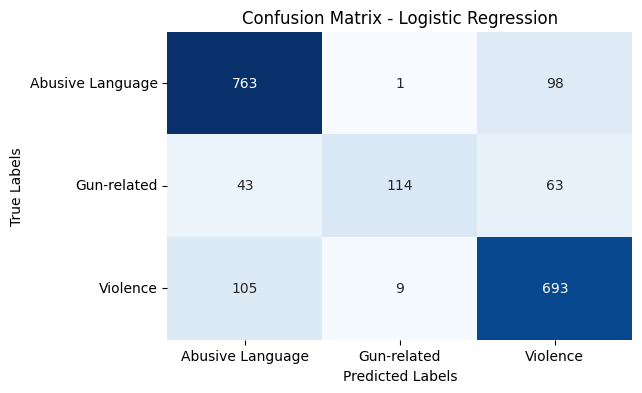

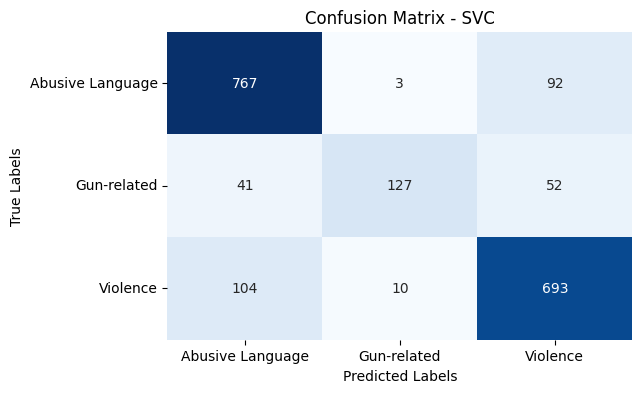

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)
svc_cm = confusion_matrix(y_test, y_pred_svc)

# Define a function to plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Plot confusion matrices for Logistic Regression and SVC
plot_confusion_matrix(log_reg_cm, "Confusion Matrix - Logistic Regression")
plot_confusion_matrix(svc_cm, "Confusion Matrix - SVC")

In [268]:
harmful_topics.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document,Topic Words,Sentiment,Cleaned_Tweet,Tweet,Category
42260,Document 42260,"yet, kill, does, history, found",Negative,come border kill,"I am coming to the borders and I will kill you all,",Violence
42270,Document 42270,"angry, tired, bitch, morning, own",Negative,man gearbox really need fix dissapointing drop new borderland dlc cant fine farm boss mayhem get legendary drop anywhere else get drop really suck alot,Man Gearbox really needs to fix this dissapointing drops in the new Borderlands 3 DLC cant be fine to farm bosses on Mayhem 10 to get 1 legendary drop while anywhere else i get 6-10 drops. . Reall...,Abusive Language
42271,Document 42271,"angry, tired, bitch, morning, own",Negative,man gearbox really need fix disappoint drop new borderland dlc farm boss mayhem get legendary drop get drop elsewhere,"Man Gearbox really needs to fix these disappointing drops in the new Borderlands 3 DLC for farm bosses on Mayhem 10 to get a legendary drop, while I get 6-10 drops elsewhere.",Abusive Language
42272,Document 42272,"angry, tired, bitch, morning, own",Negative,man gearbox really need fix disssapointing drop new borderland dlc cant fine farm boss mayhem get legendary drop elsewhere get drop really suck alot,Man Gearbox really needs to fix this disssapointing drops in the new Borderlands 3 DLC cant be fine to farm bosses on Mayhem 10 to get 1 legendary drop while elsewhere i get 6-10 drops... Really s...,Abusive Language
42273,Document 42273,"angry, tired, bitch, morning, own",Negative,man bethesda really need fix dissapointing drop new borderland cant fine farm boss mayhem get legendary drop anywhere else get drop really suck,Man Bethesda really needs to fix this dissapointing drops and the new Borderlands 3 It cant be fine to farm bosses on Mayhem 10 to get 1 legendary drop while anywhere else i get 6-10 drops.. Reall...,Abusive Language


In [275]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load the saved Logistic Regression, SVM models, and the TF-IDF vectorizer
with open('logistic_regression_model.pkl', 'rb') as file:
    log_reg = pickle.load(file)  # Loading the Logistic Regression model

with open('svc_model.pkl', 'rb') as file:
    svc = pickle.load(file)  # Loading the SVM model

with open('tfidf_vectorizer.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)  # Loading the TF-IDF vectorizer

# Step 2: Sample 30% of the cleaned tweets (same as before)
cleaned_tweets_30_percent = harmful_topics['Cleaned_Tweet'].sample(frac=0.3, random_state=42)

# Step 3: Apply the TF-IDF vectorizer to the 'Cleaned_Tweet' column (converting text to numerical features)
X_sample_tfidf = tfidf_vectorizer.transform(cleaned_tweets_30_percent)

# Step 4: Predict using both the Logistic Regression model and the SVM model
log_reg_predictions = log_reg.predict(X_sample_tfidf)
svm_predictions = svc.predict(X_sample_tfidf)

# Step 5: Add the results back to the DataFrame with new columns 'Logistic_Prediction' and 'SVM_Prediction'
harmful_topics_sampled = harmful_topics.loc[cleaned_tweets_30_percent.index]  # Get the sampled rows
harmful_topics_sampled['Logistic_Prediction'] = log_reg_predictions  # Add the Logistic Regression prediction column
harmful_topics_sampled['SVM_Prediction'] = svm_predictions  # Add the SVM prediction column

# Step 6: Visualize the DataFrame with the original tweets and their corresponding predictions
print(harmful_topics_sampled[['Cleaned_Tweet', 'Logistic_Prediction', 'SVM_Prediction']])




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                                                                                                             Cleaned_Tweet  \
49855                                                                                                                             totally angry fuck weird   
56032                                                                                                always notice red dead redemption deadeye meter empty   
58401  rainbow game yesterday get boot different game everyone get ping since cant connect game say server unreachable havent get help server yet pls help   
51899                         nothing united black hearthstone community shadowjeweler hanar literally everyone default reaction see someone play get hell   
58140                                                                  girl damage youuu kill girl everything finish recon give get crate bought u loadout   
...                                                 

In [276]:
harmful_topics_sampled.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document,Topic Words,Sentiment,Cleaned_Tweet,Tweet,Category,Logistic_Prediction,SVM_Prediction
49855,Document 49855,"angry, tired, bitch, morning, own",Negative,totally angry fuck weird,Because being totally angry or just fucking weird isnâ€™t there for me.,Abusive Language,Abusive Language,Abusive Language
56032,Document 56032,"dead, love, tragedy, season, mass",Negative,always notice red dead redemption deadeye meter empty,Always notices in Red Dead Redemption 2 when my deadeye meter is empty...,Violence,Violence,Violence
58401,Document 58401,"yet, kill, does, history, found",Negative,rainbow game yesterday get boot different game everyone get ping since cant connect game say server unreachable havent get help server yet pls help,"@Rainbow6Game Yesterday we got booted from a different game, everyone had got 1000-3000 ping and since then i cant connect to the game, it says that the server is unreachable. I havent got any hel...",Violence,Abusive Language,Abusive Language
51899,Document 51899,"gun, literally, gop, stream, line",Negative,nothing united black hearthstone community shadowjeweler hanar literally everyone default reaction see someone play get hell,"Nothing has united black Hearthstone community more that Shadowjeweler Hanar because literally everyone's default reaction to seeing someone play it is ""get the hell out of here""",Gun-related,Abusive Language,Gun-related
58140,Document 58140,"yet, kill, does, history, found",Negative,girl damage youuu kill girl everything finish recon give get crate bought u loadout,"Girl: I HAVE MORE DAMAGE THAN YOUUU!!!!. . Me: ...we both have 1 kill. . Girl: YOU DID EVERYTHING YOURSELF?! WHO FINISHED THE RECON FOR YOU?!?!. . Me: ...that only gives you $1,000 & I got the oth...",Violence,Violence,Violence
47886,Document 47886,"yet, kill, does, history, found",Negative,like critic give film rating google user give film critic even argue help common man,I like how critics give most films a rating below 50%. But Google users give it 70% +. What film critics even argue about if it does not help the common man.,Violence,Violence,Violence
70621,Document 70621,"fuck, feel, things, say, guy",Negative,girl get fuck bondage leather girl,girl get fuck bondage leather girl,Abusive Language,Abusive Language,Abusive Language
60099,Document 60099,"trump, violence, many, truth, killed",Negative,bro care release gta v fuck man gta hit many time release gta v,"Bro, we don't care about the re-release of GTA V, fuck man! Where is GTA 6 or any hit! How many times have they re-released GTA V?",Violence,Abusive Language,Violence
51547,Document 51547,"yet, kill, does, history, found",Negative,suspicion anger towards window window search failure tech slashdot org story local file search user old pc fail yet microsoft blame third party networking fiber provider,"Suspicion and Anger Towards Windows Over After Windows 10 Search Failure. tech.slashdot.org/story/20/02/09â€¦.. and local file searches on users' older PC's were failing, yet Microsoft blamed its ...",Violence,Violence,Violence
70459,Document 70459,"fuck, feel, things, say, guy",Negative,nice everyone,it's you can't be #nice to #everyone ......,Abusive Language,Abusive Language,Abusive Language


In [270]:
harmful_topics.to_csv("harmdul_topics.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
